# Importing the data

In [455]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import f1_score, classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyoff
import os
os.getcwd()
data=pd.read_csv("Churn-1.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

# Understanding the data

In [456]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [457]:
data=data.drop('customerID',axis=1)

In [458]:
data[data.iloc[:,:]==' '] = np.NaN

In [459]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [460]:
data['TotalCharges'] = data['TotalCharges'].astype(float)
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Data Manipulation

In [461]:
data=data.fillna(data.mean())

In [462]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [463]:
#Columns in the data - 

data_col=data.columns
data_col

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [464]:
# Normalizing Labels - 

le = preprocessing.LabelEncoder()
for i in data_col:
    data[i]=le.fit_transform(data[i])

In [465]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674,1


In [466]:
y=data.iloc[:,-1]
X=data.iloc[:,0:-1]

## Feature Selection

In [467]:
np.set_printoptions(precision=3)
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier  #Feature Selection using Random Forest Classifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.25*median')
embeded_rf_selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(), threshold='1.25*median')

In [468]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str((embeded_rf_feature)), 'selected features')

['tenure', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'] selected features


In [469]:
features = ['tenure', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
target = 'Churn'

x=data.loc[:,features]
scaler = StandardScaler()
X=scaler.fit_transform(X)
x=scaler.fit_transform(x)

In [470]:
X

array([[-1.01 , -0.44 ,  1.035, ...,  0.399, -1.132, -1.56 ],
       [ 0.991, -0.44 , -0.967, ...,  1.335, -0.388,  0.269],
       [ 0.991, -0.44 , -0.967, ...,  1.335, -0.517, -1.322],
       ...,
       [-1.01 , -0.44 ,  1.035, ...,  0.399, -1.142, -0.946],
       [ 0.991,  2.273,  1.035, ...,  1.335,  0.233, -1.002],
       [ 0.991, -0.44 , -0.967, ..., -1.474,  1.472,  1.57 ]])

# Data Visualization

In [471]:
data[features].describe()

,tenure,OnlineSecurity,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,0.790004,0.797104,0.690473,1.574329,683.524776,3102.628851
std,24.559481,0.859848,0.861551,0.833755,1.068104,478.511521,1941.917788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,0.000000,1.000000,199.000000,1382.500000
50%,29.000000,1.000000,1.000000,0.000000,2.000000,722.000000,3070.000000
75%,55.000000,2.000000,2.000000,1.000000,2.000000,1090.000000,4780.500000
max,72.000000,2.000000,2.000000,2.000000,3.000000,1584.000000,6530.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002EADE712D30>,
      dtype=object)

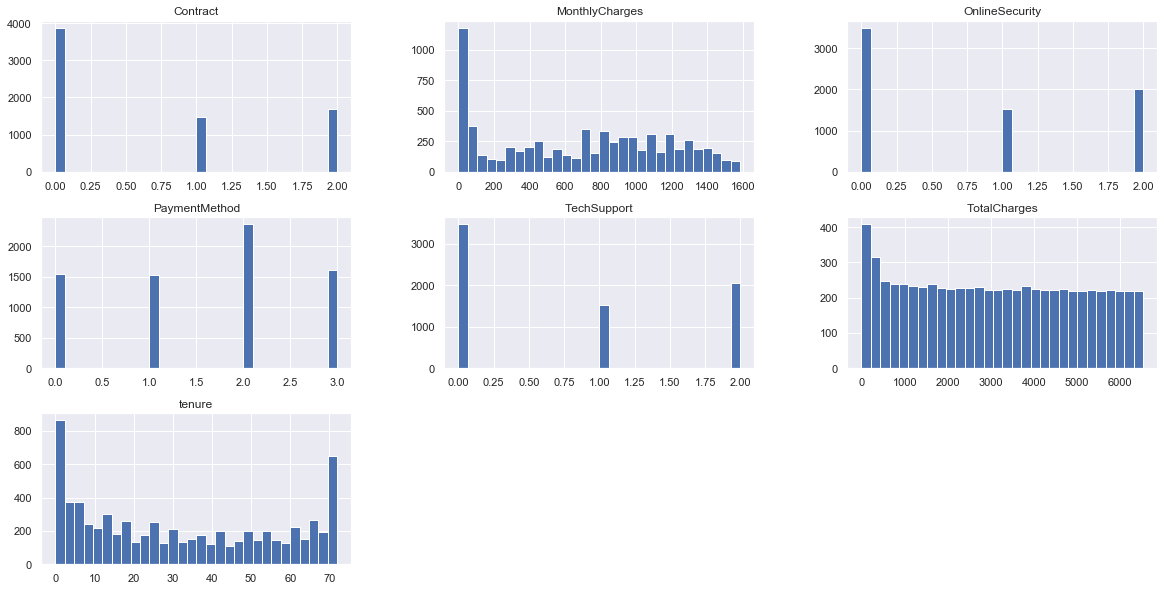

In [472]:
#Plotting histograms for selected features

data[features].hist(bins=30, figsize=(20, 10))

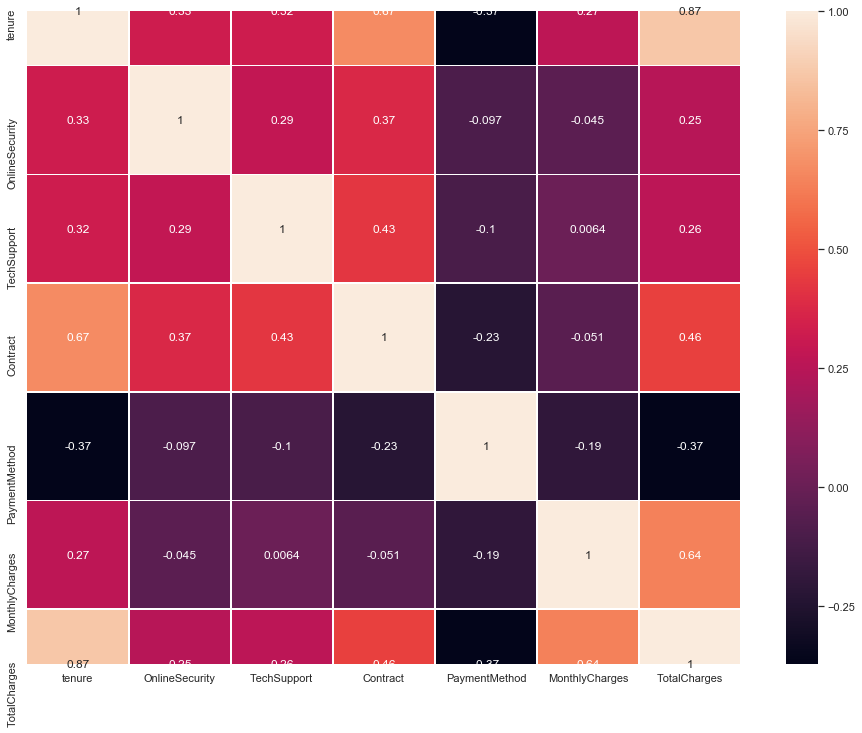

In [473]:
# Displaying correlation of selected features -

numerical = features
corr_matrix = data[numerical].corr()
fig, ax = plt.subplots(figsize=(16,12)) 
sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax)

In [474]:
# Tenure cum Churn Rate -

df_plot = data.groupby('tenure').Churn.mean().reset_index()
plot_data = [
    go.Scatter(
        x=df_plot['tenure'],
        y=df_plot['Churn'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           ),
    )
]
plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Tenure"},
        title='Tenure based Churn rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

# Implement Machine Learning Models

## Train Test Split

In [475]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [476]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## XGBoost Algorithm

In [477]:
from xgboost import XGBClassifier, plot_importance
import xgboost as xgb
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)

In [478]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'

acc_xgb = cross_val_score(estimator = xgb_classifier, X = X_train, y = y_train, cv = kfold,scoring=scoring)
print("Average: ",acc_xgb.mean())
print("Max: ",max(acc_xgb)*100)

C:\Program Data 2\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



Average:  0.7797160243407708
Max:  81.13590263691684


## Gradient Boosting Algorithm

In [479]:
from sklearn  import ensemble
gboost =ensemble.GradientBoostingClassifier()
gboost.fit(X_train, y_train)

GradientBoostingClassifier()

In [480]:
acc_gbbost = cross_val_score(estimator = gboost, X = X_train, y = y_train, cv = kfold,scoring=scoring)
print("Average: ",acc_gbbost.mean())
print("Max: ",max(acc_gbbost)*100)
ypred=gboost.predict(X_test)

Average:  0.7987829614604463
Max:  82.96146044624746


## Support Vector Machine

In [481]:
from sklearn.svm import SVC
svc_cl = SVC(kernel = 'rbf', random_state = 0)
svc_cl.fit(X_train, y_train)

SVC(random_state=0)

In [482]:
acc_svc1 = cross_val_score(estimator = svc_cl, X = X_train, y = y_train, cv = kfold,scoring=scoring)
print("Average: ",acc_svc1.mean())
print("Max: ",max(acc_svc1)*100)

Average:  0.7961460446247465
Max:  83.56997971602435


## Random Forest

In [483]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [484]:
acc_random1 = cross_val_score(estimator = random_forest, X = X_train, y = y_train, cv = kfold,scoring=scoring)
print("Average: ",acc_random1.mean())
print("Max: ",max(acc_random1)*100)

Average:  0.7827586206896552
Max:  80.32454361054768


## Naive Bayes

In [485]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

GaussianNB()

In [486]:
acc_gaussion1 = cross_val_score(estimator = gaussian, X = X_train, y = y_train, cv = kfold,scoring=scoring)
print("Average: ",acc_gaussion1.mean())
print("Max: ",max(acc_gaussion1)*100)

Average:  0.7594320486815416
Max:  78.90466531440163


In [487]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1560
           1       0.64      0.54      0.58       553

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



# Model Evaluation

accuracy:   80.076
[[1396  164]
 [ 257  296]]


Text(30.5, 0.5, 'true values')

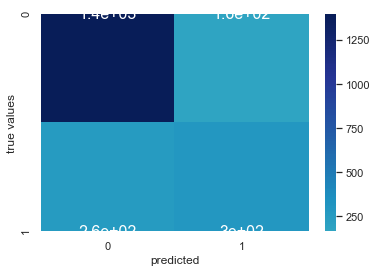

In [488]:
# Confusion Matrix of xgboost

score = metrics.accuracy_score(y_test, ypred)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, ypred, labels=[0,1])
print(cm)

sns.set(font_scale=1)
sns.heatmap(cm,annot=True,annot_kws={'size':16}, cmap="YlGnBu", center=0)
plt.xlabel("predicted")
plt.ylabel("true values")

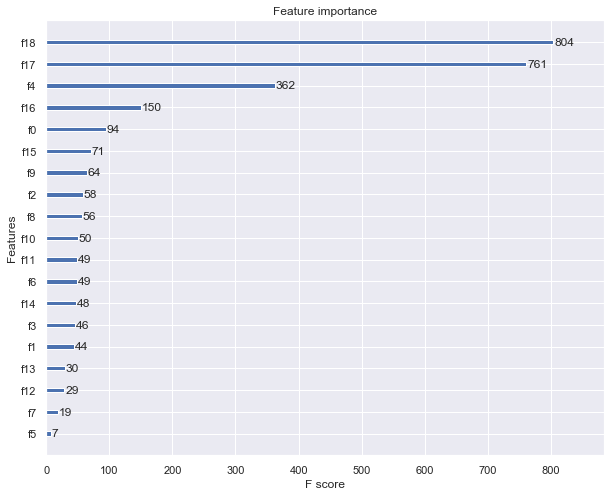

In [489]:
# Feature importance - 

fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_classifier, ax=ax)

In [490]:
xgb_classifier.feature_importances_

array([0.016, 0.021, 0.015, 0.015, 0.029, 0.032, 0.025, 0.091, 0.063,
       0.023, 0.016, 0.046, 0.019, 0.033, 0.475, 0.021, 0.016, 0.021,
       0.021], dtype=float32)

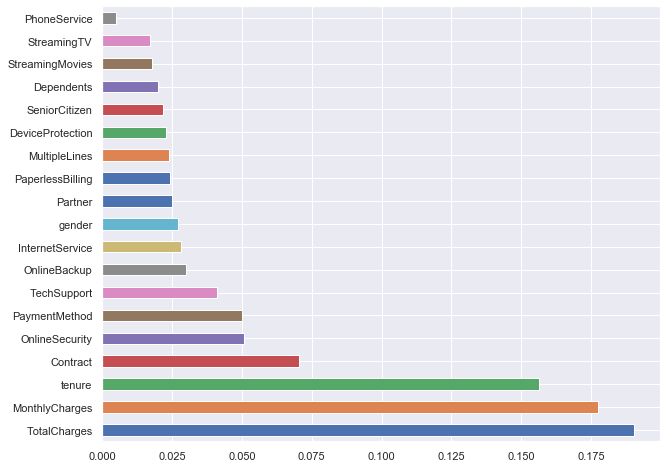

In [491]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
data=data.drop('Churn',axis=1)
fig, ax = plt.subplots(figsize=(10,8))
(pd.Series(model.feature_importances_, index=data.columns)
   .nlargest(19)
   .plot(kind='barh'))     

# Final Conclusions

In [492]:
models_cross = pd.DataFrame({
    'Model': ['XG Boost','GradientBoosting','Support Vector Machines', 
              'Random Forest', 'Guassian Naive Bayes'],
    'Score': [max(acc_xgb)*100,max(acc_gbbost)*100,max(acc_svc1)*100, 
              max(acc_random1)*100, max(acc_gaussion1)*100]})
    
models_cross.sort_values(by='Score', ascending=True)

,Model,Score
4,Guassian Naive Bayes,78.904665
3,Random Forest,80.324544
0,XG Boost,81.135903
1,GradientBoosting,82.961460
2,Support Vector Machines,83.569980


In [493]:
# I have used 5 Classifiers for classification - 
# Randome Forest
# Guassian Naive Bayes
# XG Boost
# GradientBoosting
# Support Vector Machines
# The highest accuracy was given by SVM - 83%

# Answers

## 1.

In [494]:
# We look at data from customers that already have churned and their characteristics before the churning. 
# By fitting a statistical model that relates the predictors to the response, we try to predict the response for our
# existing customers. For this we use supervised learning techniques.
# I used Random Forest feature Selection for shortlisting the most important features among the other 19 features given.

## 2.

accuracy:   80.076
[[1396  164]
 [ 257  296]]


Text(30.5, 0.5, 'true values')

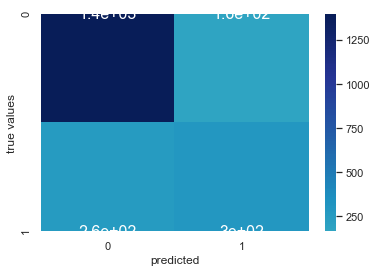

In [495]:
# Model Demonstration - 
# Confusion Matrix of xgboost

score = metrics.accuracy_score(y_test, ypred)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, ypred, labels=[0,1])
print(cm)

sns.set(font_scale=1)
sns.heatmap(cm,annot=True,annot_kws={'size':16}, cmap="YlGnBu", center=0)
plt.xlabel("predicted")
plt.ylabel("true values")

In [496]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1560
           1       0.64      0.54      0.58       553

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



## 3.

In [ ]:
# Key Factors to predict customer churn as seen in the above Feature importance graph are - tenure, MonthlyCharges,
# TotalCharges. I used both random forest and xgboost for plotting feature importance graph.

## 4.

In [497]:
# 1. Anticipating Customer Needs and Preparing Operations to Meet Them.
# 2. Reducing monthly charges.
# 3. By offering high quality Online Backup.
# 4. Ensuring good security and online service.

## 5.

In [ ]:
# Assuming these above actions work, new dataset can be created and churning can be predicted using classification 
# algorithms, therby predicting the respective decrease or increase.